# 📈 Portfolio Optimisation (Sharpe Ratio Maximisation)

- **Objective**: Maximise return for a given level of risk or minimise risk for a given return.
- **Uses**: Expected returns, variances, and covariances.
- **Output**: The efficient frontier — a set of optimal portfolios.
- **Focus**: Balances return vs risk, not necessarily in a single number.

In [22]:
from datetime import datetime, timedelta
from typing import Final

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.io as pio

pio.renderers.default = "notebook"

## Ticker Data

In [23]:
END_DATE = datetime.today()
DAYS_IN_A_YEAR = 365
NUMBER_OF_YEARS = 5
START_DATE = END_DATE - timedelta(days = NUMBER_OF_YEARS * DAYS_IN_A_YEAR)

TICKERS: Final[list[str]] = ['AAPL', 'MSFT', 'META', 'AMZN', 'XOM', 'UNH', 'JNJ', 'V', 'HD', 'ABBV', 'KO', 'DIS', 'T', 'UPS', 'LMT', 'CAT', 'F', 'MAR', 'O', 'HSY']

data = yf.download(TICKERS, start=START_DATE, end=END_DATE, auto_adjust=True, progress=False)
data.head()

Price            Close                                                 \
Ticker            AAPL       ABBV        AMZN         CAT         DIS   
Date                                                                    
2020-09-17  107.329674  73.288330  150.436493  139.464951  128.084747   
2020-09-18  103.925171  73.680824  147.745499  138.123505  126.520813   
2020-09-21  107.076782  72.846794  148.023499  131.724457  123.353615   
2020-09-22  108.759575  72.446114  156.449493  133.374054  125.124092   
2020-09-23  104.197540  71.252319  149.992996  130.863342  121.258530   

Price                                                                ...  \
Ticker             F          HD         HSY         JNJ         KO  ...   
Date                                                                 ...   
2020-09-17  5.587593  248.107574  125.029732  127.607018  43.788601  ...   
2020-09-18  5.549215  243.880310  123.623680  129.349869  43.701965  ...   
2020-09-21  5.272906  241.363373  121.915085  125.812195  42.523880  ...   
2020-09-22  5.203829  242.214157  122.297745  125.040504  43.017639  ...   
2020-09-23  5.096375  236.223251  119.547989  125.239944  41.761578  ...   

Price        Volume                                                           \
Ticker          LMT      MAR      META      MSFT        O         T      UNH   
Date                                                                           
2020-09-17   959500  2763100  31281400  34011300  2923450  41904600  2394100   
2020-09-18  2636400  5327700  28130800  55225300  4064326  60721023  3795400   
2020-09-21  1447400  4863200  24709400  39839700  3324898  60207576  4124700   
2020-09-22  1286300  3605400  30293100  33517100  2072566  37268482  3163600   
2020-09-23  1223300  2788300  19641300  30803800  2425200  57973723  3709900   

Price                                   
Ticker          UPS        V       XOM  
Date                                    
2020-09-17  3002200  7474900  24696200  
2020-09-18  7274000  9084100  46853800  
2020-09-21  3894400  9656000  35351800  
2020-09-22  3051900  7543100  27303200  
2020-09-23  3842400  6310600  31251400  

[5 rows x 100 columns]

## Visualise Stock Prices

In [26]:
# Extract the close prices for all tickers
close_prices = data.loc[:, ('Close', slice(None))]

# Drop the top level ("Close") so columns are just the tickers
close_prices.columns = close_prices.columns.droplevel(0)

portfolio_returns = close_prices.pct_change().dropna()

port_comps_rets_cumprod = (1 + portfolio_returns).cumprod() - 1
port_comps_rets_cumprod *= 100

fig = px.line(
    port_comps_rets_cumprod,
    x=list(port_comps_rets_cumprod.index),
    y=list(port_comps_rets_cumprod.columns),   # force plain list
    title=f"Cumulative Returns of Portfolio Stocks ({START_DATE.year}–{END_DATE.year})"
)
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Cumulative Return (%)")
fig.show()

## Benchmark Portfolio Returns Against S&P 500

In [27]:
sp_index = yf.download("^GSPC", start=START_DATE, end=END_DATE, auto_adjust=True, progress=False)
sp_index.head()

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2020-09-17,3357.010010,3375.169922,3328.820068,3346.860107,4379840000
2020-09-18,3319.469971,3362.270020,3292.399902,3357.379883,7076400000
2020-09-21,3281.060059,3285.570068,3229.100098,3285.570068,4836070000
2020-09-22,3315.570068,3320.310059,3270.949951,3295.750000,3974510000
2020-09-23,3236.919922,3323.350098,3232.570068,3320.110107,4378650000


<Axes: xlabel='Ticker', ylabel='Ticker'>

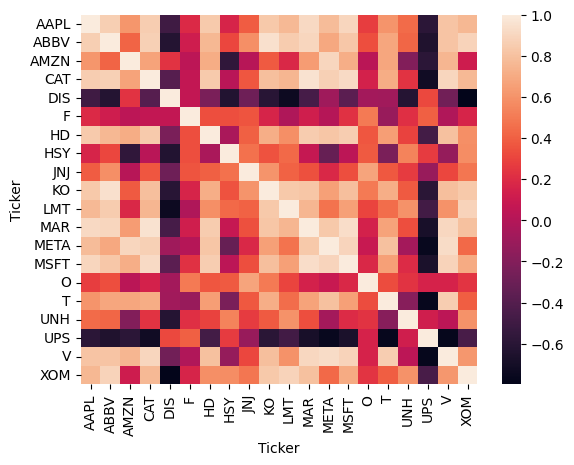

In [29]:
#Create a correlation heatmap to visualize portfolio asset neutrality, ensure stocks are diversified
port_corr = port_comps_rets_cumprod.corr()
sns.heatmap(port_corr)